In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
from sklearn import preprocessing
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

# apply Label encoder to df_categorical
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

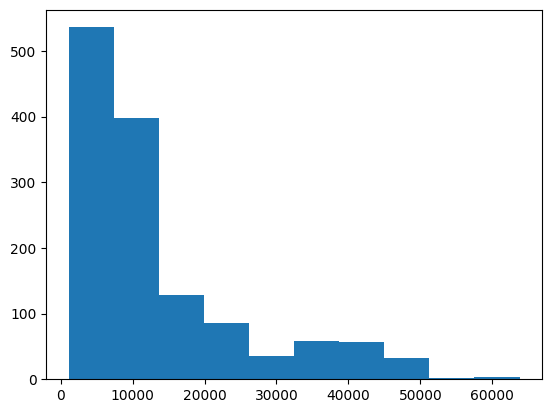

In [7]:
plt.hist(df['charges'])

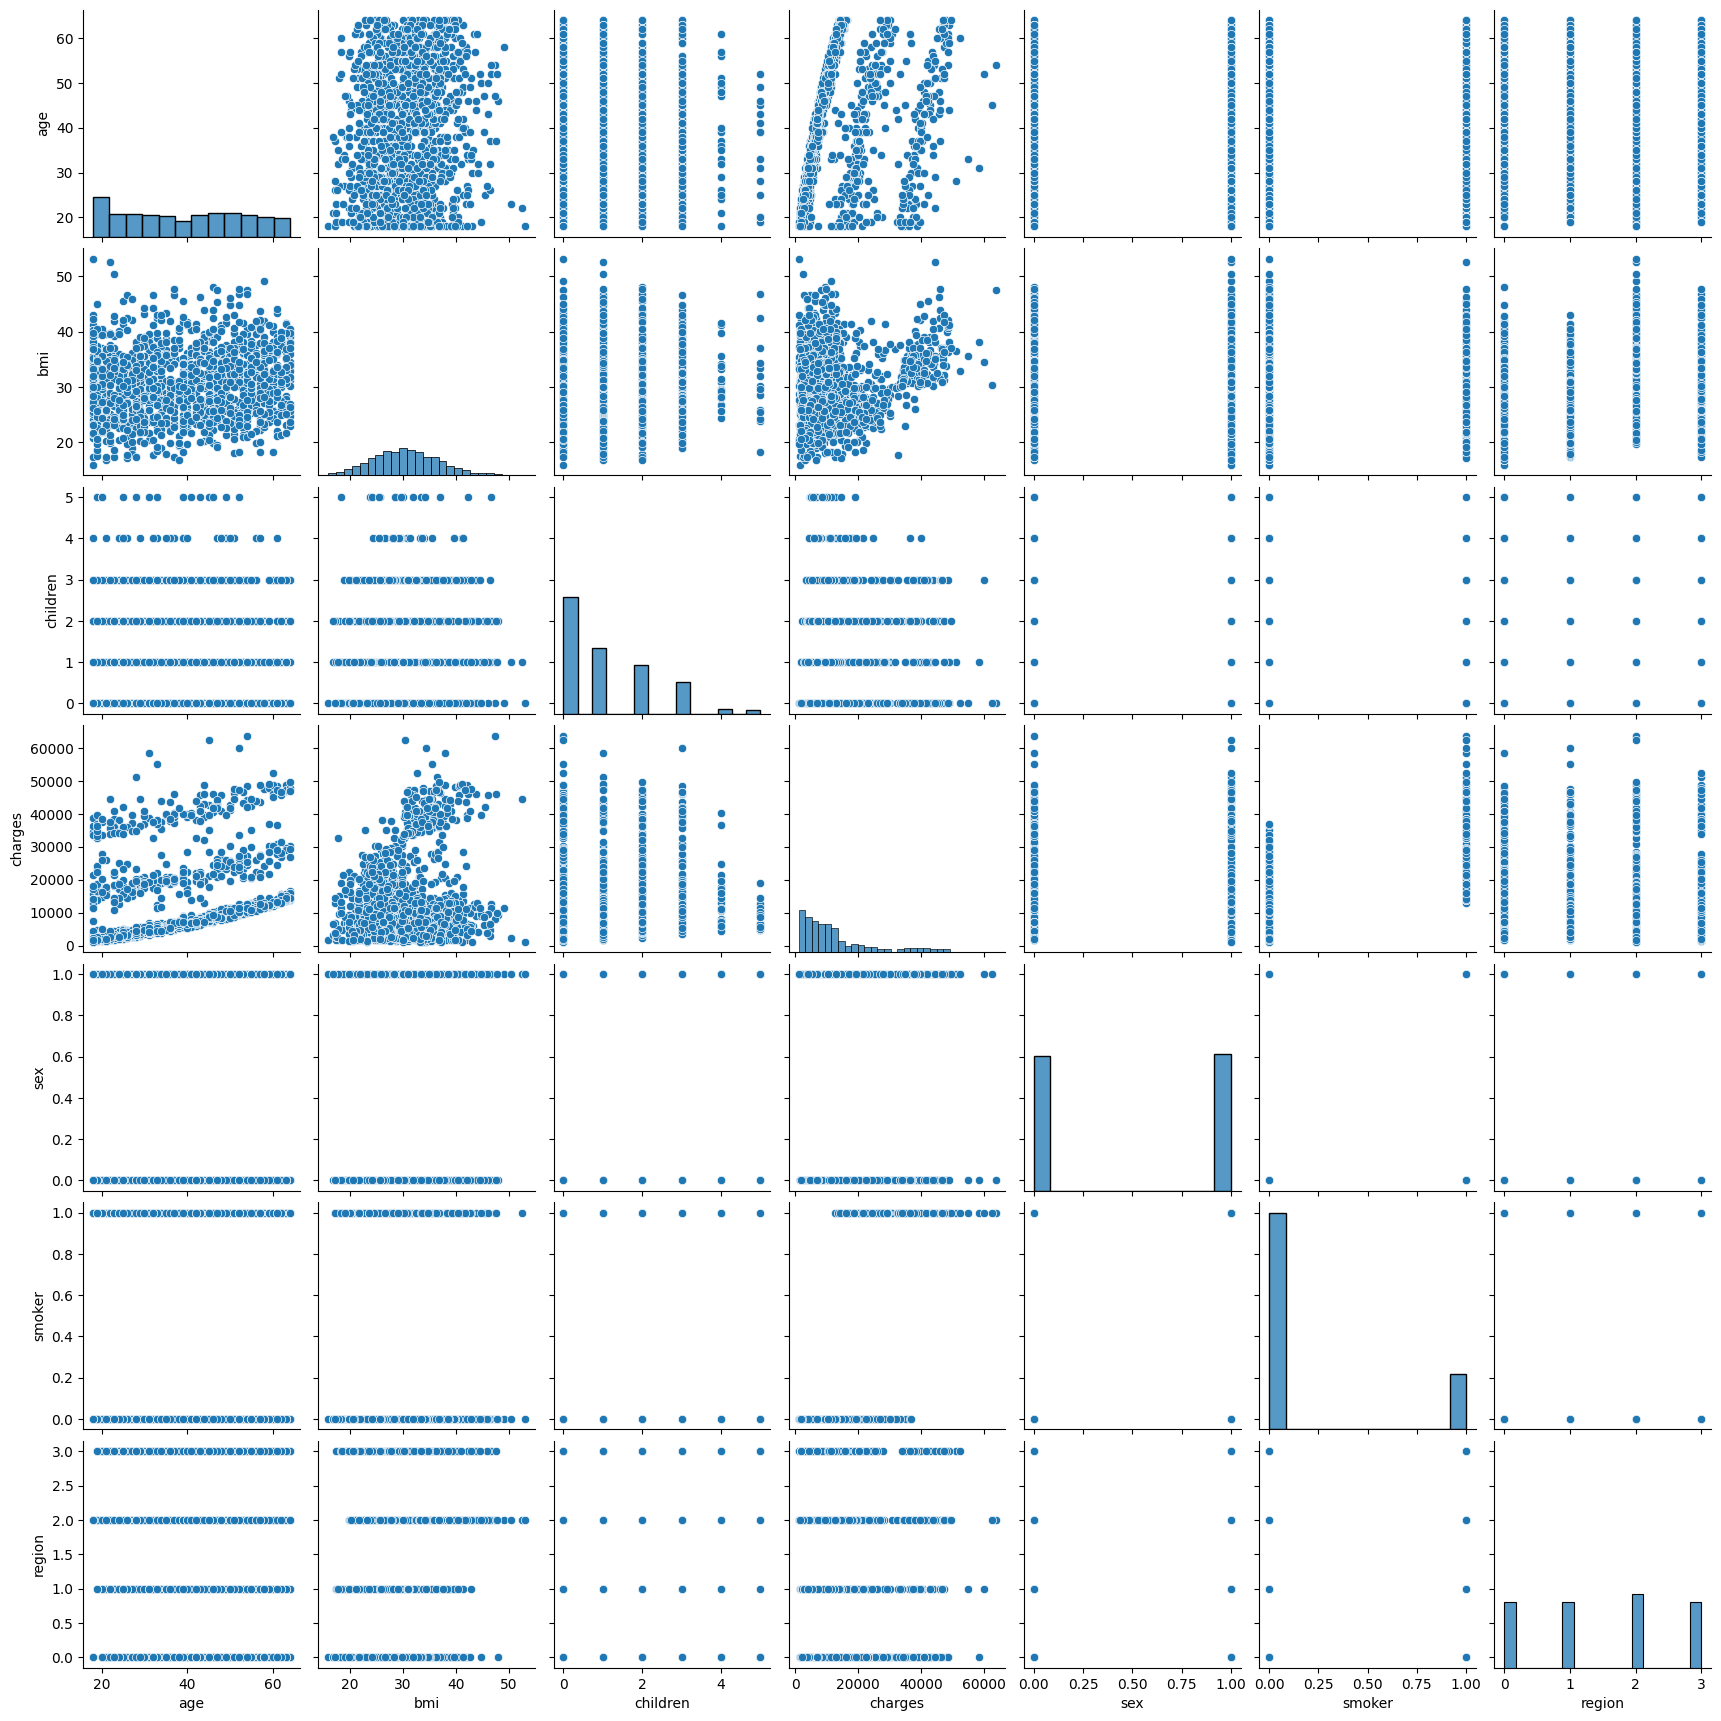

In [8]:
sns.pairplot(df)

<Axes: >

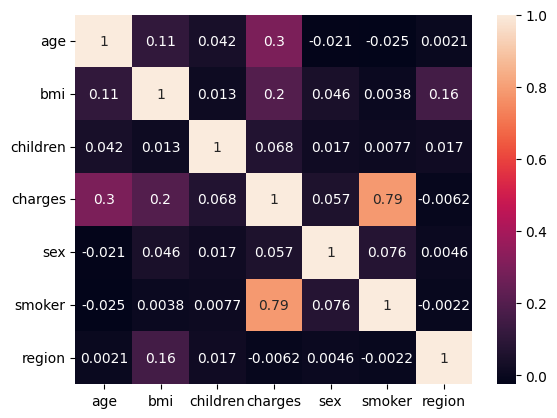

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
x=df.drop('charges',axis=1)

In [11]:
x

,age,bmi,children,sex,smoker,region
0,19,27.900,0,0,1,3
1,18,33.770,1,1,0,2
2,28,33.000,3,1,0,2
3,33,22.705,0,1,0,1
4,32,28.880,0,1,0,1
...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1
1334,18,31.920,0,0,0,0
1335,18,36.850,0,0,0,2
1336,21,25.800,0,0,0,3


In [12]:
y=df['charges']

In [13]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm=LinearRegression()

In [18]:
lm.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
lm.intercept_

np.float64(-11775.886698412998)

In [20]:
lm.coef_

array([  245.94487173,   348.73926682,   546.84795959,  -173.89871781,
       24234.33665543,  -524.00517078])

In [21]:
CO=pd.DataFrame(lm.coef_,x.columns,columns=['charges'])
CO

,charges
age,245.944872
bmi,348.739267
children,546.847960
sex,-173.898718
smoker,24234.336655
region,-524.005171


In [22]:
pr=lm.predict(x_test)

In [23]:
pr

array([ 1.14891823e+04,  6.40909856e+03,  3.16603449e+04,  1.00628632e+04,
        8.10876223e+03,  9.37157925e+03,  3.58055813e+04,  8.45771081e+03,
        1.29944467e+04,  3.96966715e+04,  1.57050470e+03,  3.70507718e+04,
        4.23657419e+03,  1.23385786e+04,  8.12482192e+03,  5.08395167e+03,
        5.35402656e+03,  3.53259179e+03,  3.54168239e+04,  3.32162171e+04,
        3.89611414e+04,  1.35122961e+04,  8.16992141e+03,  9.70512987e+03,
        3.59253106e+04,  7.03079293e+03,  5.24782428e+03,  2.93211582e+04,
        5.51087549e+02,  1.13129683e+04,  1.36495384e+04,  4.93242756e+03,
        3.86648203e+03,  1.19644550e+04,  8.95700850e+03,  2.92567495e+04,
        1.12024047e+04,  1.06305280e+04,  9.76292042e+03,  4.46165136e+03,
        1.08676803e+04,  3.42958650e+04,  1.12233816e+04,  3.19061467e+04,
        1.13116850e+04,  1.35173352e+04,  4.40133325e+03,  5.43935233e+03,
        8.70107859e+03,  5.32477050e+03,  1.34567243e+04,  8.96597805e+03,
        1.03461062e+04,  

In [24]:
Real_Values=np.array(y_test)

In [25]:
Real_Values

array([13041.921  ,  5031.26955, 20984.0936 , 25656.57526,  3201.24515,
        7256.7231 , 41999.52   , 12404.8791 , 14001.1338 , 47269.854  ,
        2597.779  , 29330.98315,  2741.948  , 14256.1928 ,  6238.298  ,
        4746.344  ,  6652.5288 ,  2250.8352 , 41676.0811 , 39836.519  ,
       47928.03   ,  7650.77375,  6457.8434 , 11837.16   , 42211.1382 ,
        4837.5823 ,  4894.7533 , 36219.40545,  2201.0971 ,  8556.907  ,
       12644.589  ,  2473.3341 ,  4032.2407 , 13224.693  ,  5584.3057 ,
       19350.3689 , 12479.70895,  7261.741  , 30284.64294,  3537.703  ,
       11165.41765, 40003.33225, 10264.4421 , 21098.55405, 11554.2236 ,
        9880.068  ,  4340.4409 ,  4435.0942 , 26140.3603 , 27375.90478,
       11674.13   ,  6338.0756 ,  9724.53   ,  3443.064  ,  3490.5491 ,
       10579.711  , 10602.385  ,  8527.532  ,  7325.0482 , 33475.81715,
       35491.64   ,  4076.497  ,  1137.4697 ,  3943.5954 ,  2523.1695 ,
        5469.0066 , 14133.03775,  1141.4451 ,  4133.64165, 26125

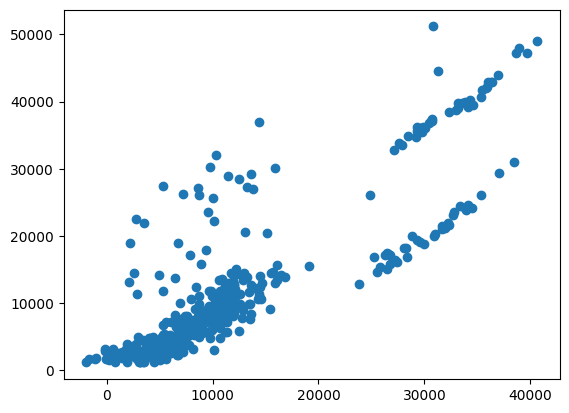

In [26]:
plt.scatter(x=pr,y=Real_Values)

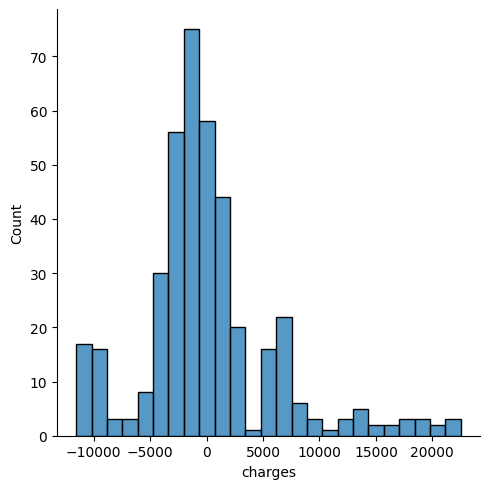

In [27]:
sns.displot(y_test-pr,bins=25)

In [28]:
from sklearn import metrics 

In [29]:
metrics.mean_absolute_error(y_test,pr)

4044.9876601373294

In [30]:
metrics.mean_squared_error(y_test,pr)

35359546.65440907

In [31]:
np.sqrt(metrics.mean_squared_error(y_test,pr))

np.float64(5946.3893796495595)

In [32]:
metrics.r2_score(y_test,pr)

0.7289379757416038